# Rodrigo Custodio Vargas, Carné: 15220

In [1]:
import pandas as pd
from nltk import RegexpTokenizer, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [2]:
df = pd.read_csv("data/result.csv")

In [3]:
df.loc[:, "rating"] = (df.loc[:, "rating"] / 10).astype(int)

# Distribución de los ratings de los reviews

Text(0, 0.5, 'Frecuencia')

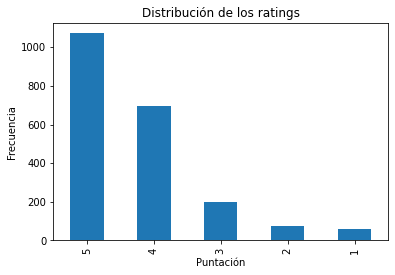

In [4]:
ax= df["rating"].value_counts().plot(kind="bar", title="Distribución de los ratings")
ax.set_xlabel("Puntación")
ax.set_ylabel("Frecuencia")

# Promedio, mediana, desviación estándar de los ratings

In [5]:
# Mediana == Percentil 50
print(df["rating"].describe())

count    2100.000000
mean        4.261429
std         0.964712
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64


# Distribución de longitudes

In [6]:
mega_document = df["review"].str.cat(sep=" ")

In [7]:
tokenizer = RegexpTokenizer(r"\w+")
tokenized_text = []
for sent in sent_tokenize(mega_document):
    tokenized_text += [token.lower() for token in tokenizer.tokenize(sent)]

### Lematización y derivación

In [8]:
lemmatizer = WordNetLemmatizer() 
lemmas = []
for token in tokenized_text:
    lemmas.append(lemmatizer.lemmatize(token))
len(lemmas)

182107

In [9]:
stemmer = PorterStemmer() 
lemmatizer = WordNetLemmatizer() 
lemmas = []
stems = []
for token in tokenized_text:
    lemmas.append(lemmatizer.lemmatize(token))
    stems.append(stemmer.stem(token))
lemmas = pd.Series(lemmas)
stems = pd.Series(stems)
tokens = pd.Series(tokenized_text)

# Distribución de longitudes por lemmas, stems y palabras

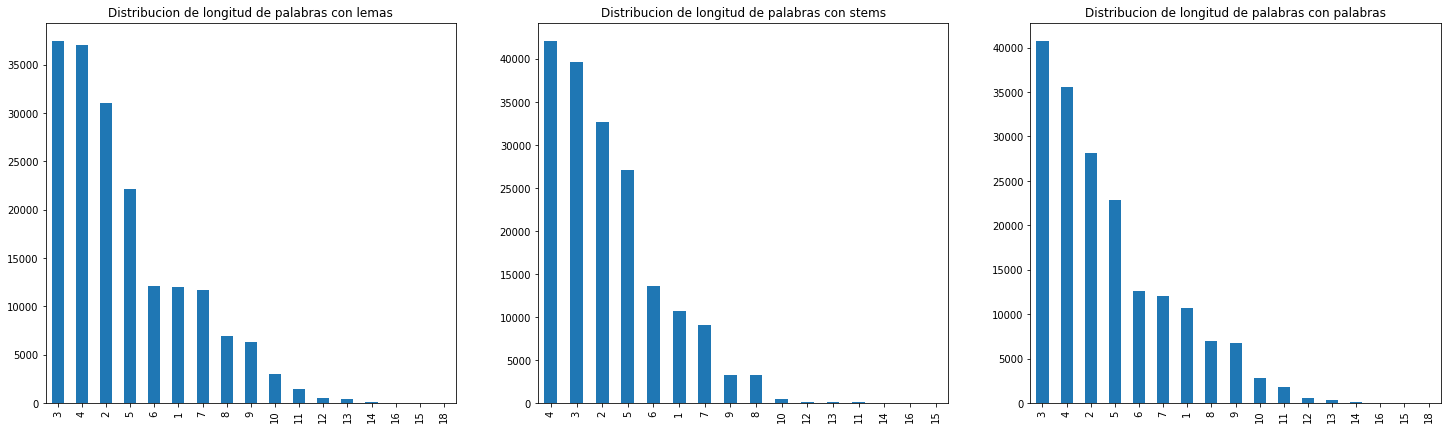

In [10]:
fig, axes = plt.subplots(ncols=3, figsize=(25,7))
lemmas.str.len().value_counts().plot(ax=axes[0], kind="bar", title="Distribucion de longitud de palabras con lemas")
stems.str.len().value_counts().plot(ax=axes[1], kind="bar", title="Distribucion de longitud de palabras con stems")
tokens.str.len().value_counts().plot(ax=axes[2], kind="bar", title="Distribucion de longitud de palabras con palabras")

# Distribución de longitud (en palabras, lemas y stems) de los reviews para cada calificación diferente

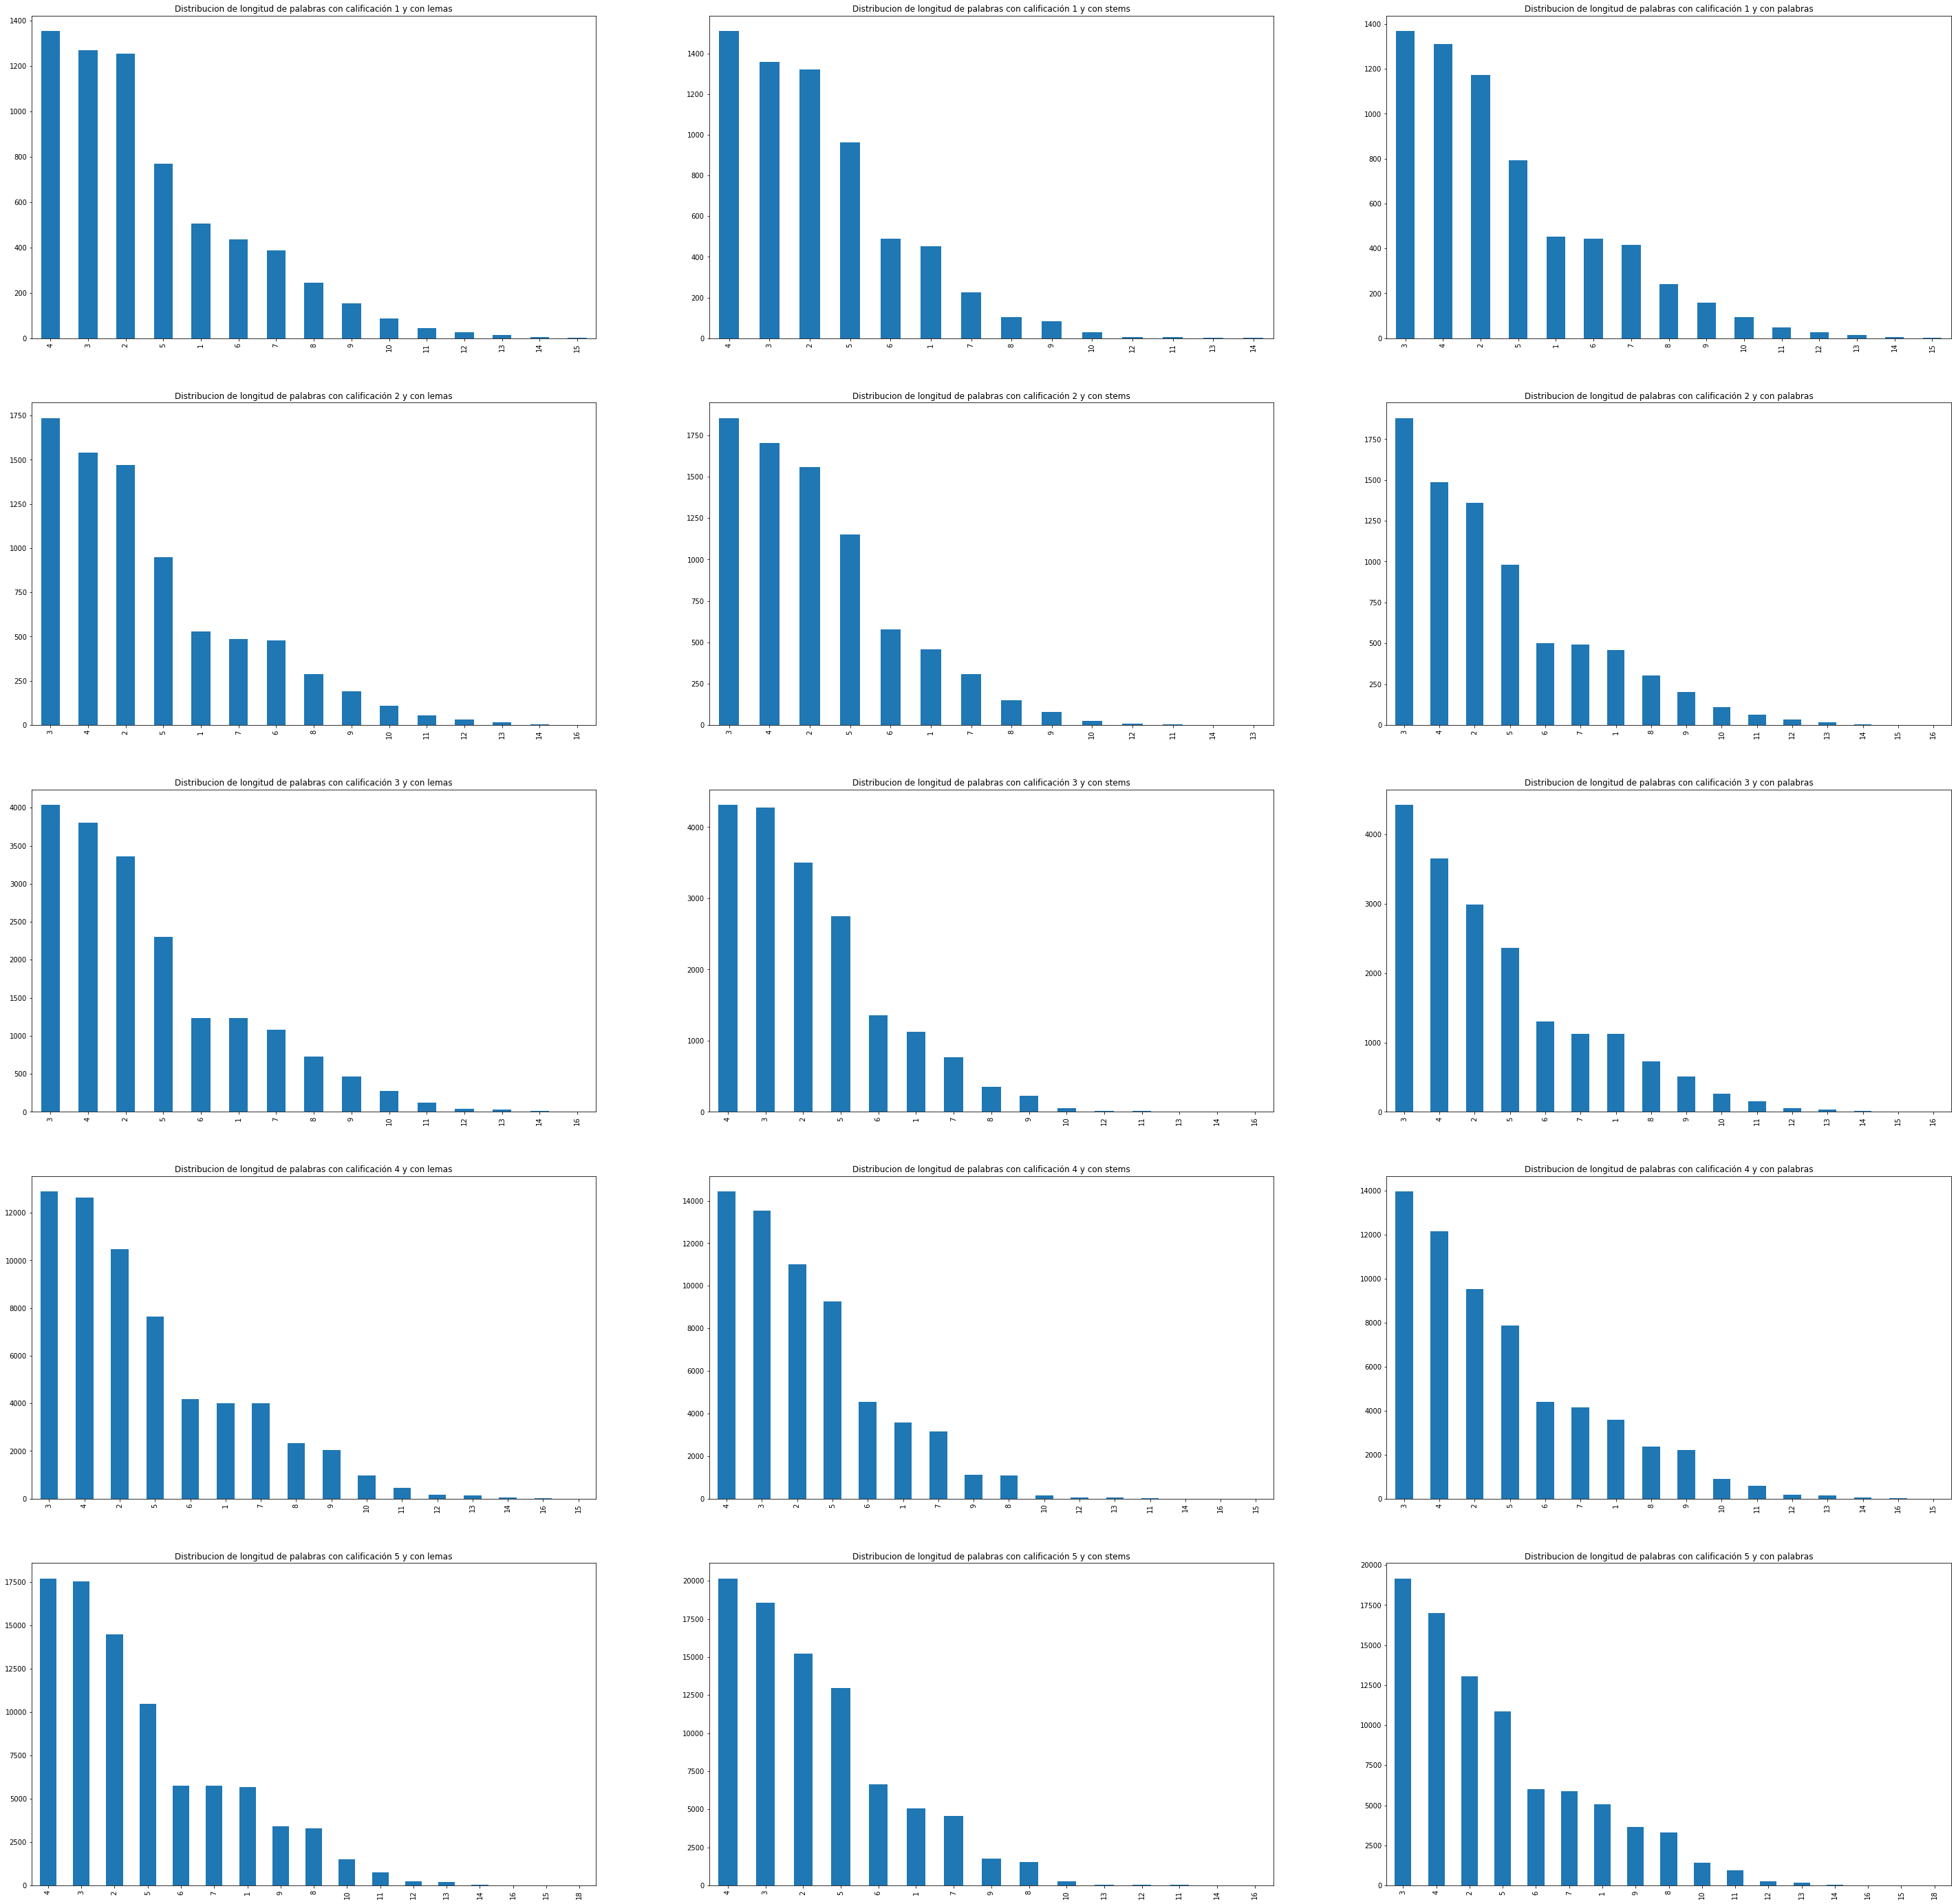

In [21]:
dfbyrating = df.groupby(["rating"])["review"].apply(lambda x: ' '.join(x)).reset_index()
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(50, 50))
bags_of_words = []
for i, rat in enumerate(dfbyrating["rating"]):
    tokenized_text = []
    for sent in sent_tokenize(dfbyrating.iloc[i]["review"]):
        tokenized_text += [token.lower() for token in tokenizer.tokenize(sent)]
    lemmas = []
    stems = []
    for token in tokenized_text:
        lemmas.append(lemmatizer.lemmatize(token))
        stems.append(stemmer.stem(token))
    lemmas = pd.Series(lemmas)
    stems = pd.Series(stems)
    tokens = pd.Series(tokenized_text)
    lemmas.str.len().value_counts().plot(ax=axes[i, 0], kind="bar", title=f"Distribucion de longitud de palabras con calificación {rat} y con lemas")
    stems.str.len().value_counts().plot(ax=axes[i, 1], kind="bar", title=f"Distribucion de longitud de palabras con calificación {rat} y con stems")
    tokens.str.len().value_counts().plot(ax=axes[i, 2], kind="bar", title=f"Distribucion de longitud de palabras con calificación {rat} y con palabras")
    bags_of_words.append(tokens.value_counts())

fig
    

# Bag of words

In [25]:
for i, bag in enumerate(bags_of_words):
    print(f"Bag of words del rating: {i + 1}")
    print(bag)

Bag of words del rating: 1
the        340
and        200
to         187
i          176
a          165
          ... 
between      1
serve        1
bulb         1
under        1
ie           1
Length: 1491, dtype: int64
Bag of words del rating: 2
the           509
and           268
to            256
a             180
was           165
             ... 
presented       1
clothing        1
apparently      1
decision        1
feel            1
Length: 1607, dtype: int64
Bag of words del rating: 3
the          1255
and           613
to            502
a             495
was           422
             ... 
slot            1
buildings       1
robes           1
airline         1
1976            1
Length: 2586, dtype: int64
Bag of words del rating: 4
the        4100
and        2378
a          1859
to         1501
was        1206
           ... 
elena         1
luved         1
behaved       1
drunk         1
walkers       1
Length: 4471, dtype: int64
Bag of words del rating: 5
the         5584
and

# Eliminación de stop words y word cloud por review

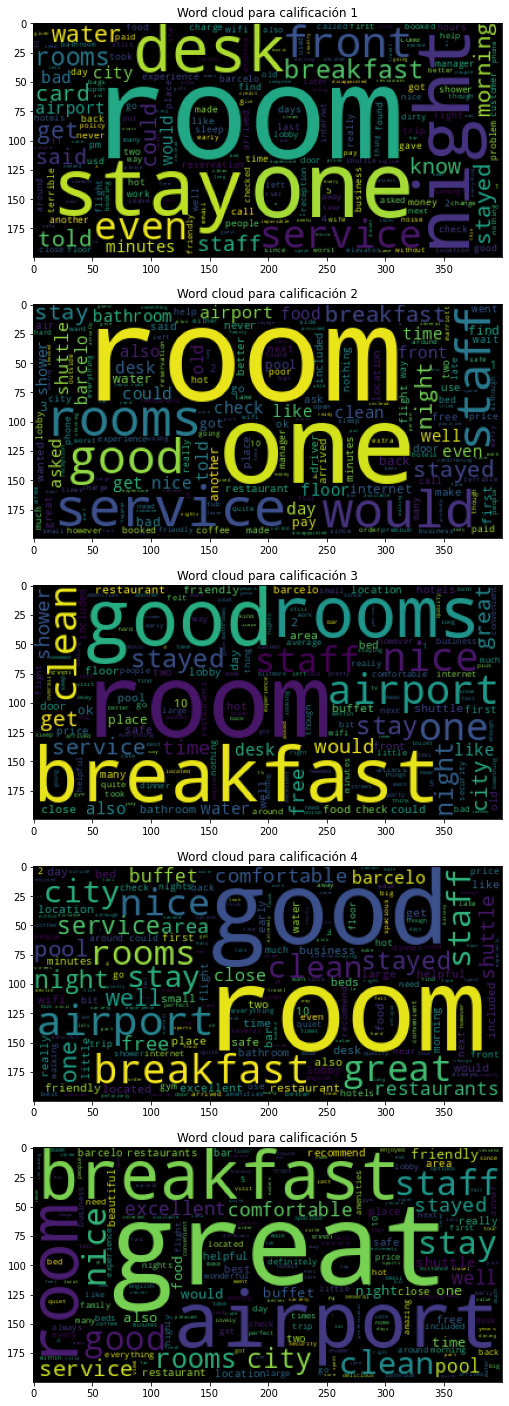

In [30]:
fig, axes = plt.subplots(nrows=5, figsize=(50, 25))
stops = stopwords.words("english")
stops += ["hotel", "guatemala", "us"]
for i, ax in enumerate(axes):
    tmpbag = bags_of_words[i].to_dict()
    bag = {word: freq for (word, freq) in tmpbag.items() if word not in stops}
    img = WordCloud().generate_from_frequencies(bag)
    ax.set_title(f"Word cloud para calificación {i + 1}")
    ax.imshow(img)
fig

Como se puede observar a simple vista en las word clouds, varios palabras son compartidas alrededor de todas las calificaciones de los hoteles de la ciudad. Me parece interesante que el desayuno es un tema de que hablar para calificaciones menores o iguales a 3. Tal vez a los turistas no les gustan los frijolitos con huevo como a todos los de Guatemala nos gusta...